In [1]:
import math
import collections
import pickle
import random
import scipy
import json

from matplotlib import pyplot as plt

import GPy
import numpy as np
import pandas as pd
from tqdm import tqdm


OG_plate1 = pd.read_excel('15Nov22_Checks.xlsx', 'OG_Plate1')
OG_plate2 = pd.read_excel('15Nov22_Checks.xlsx', 'OG_Plate2')
OG_plate3 = pd.read_excel('15Nov22_Checks.xlsx', 'OG_Plate3')

Prod_plate1 = pd.read_excel('15Nov22_Checks.xlsx', 'Prod_Plate1')
Prod_plate2 = pd.read_excel('15Nov22_Checks.xlsx', 'Prod_Plate2')
Prod_plate3 = pd.read_excel('15Nov22_Checks.xlsx', 'Prod_Plate3')

og = []

for row in np.arange(48,52):
    og = og + OG_plate1.iloc[row, 8:15].values.tolist()
for row in np.arange(48,52):
    og = og + OG_plate2.iloc[row, 8:15].values.tolist()
for row in np.arange(48,52):
    og = og + OG_plate3.iloc[row, 8:15].values.tolist()

Prod = []
for row in np.arange(48,52):
    Prod = Prod + Prod_plate1.iloc[row, 8:15].values.tolist()
for row in np.arange(48,52):
    Prod = Prod + Prod_plate2.iloc[row, 8:15].values.tolist()
for row in np.arange(48,52):
    Prod = Prod + Prod_plate3.iloc[row, 8:15].values.tolist()

OD_data = pd.concat((pd.DataFrame(Prod),pd.DataFrame(og)), axis = 1)
OD_data.columns = ['OD_Prod', 'OD_OG']
OD_data.to_excel('OD.xlsx', sheet_name='Sheet1', index=False, startcol = 0)

In [2]:
Output = pd.read_excel('Titer_OD.xlsx')
Output

,Production Condition,Titer,OD_Prod,OD_OG
0,Exp0,3.553466,25.021250,3.97875
1,Exp0,3.319323,24.387500,3.74375
2,Exp0,3.611843,23.621250,3.77000
3,Exp1,17.978141,9.028750,3.86000
4,Exp1,17.542393,8.461250,3.81250
...,...,...,...,...
67,Exp22,78.727926,6.693750,4.29625
68,Exp22,82.137571,7.312500,4.74750
69,Exp23,54.431361,8.892500,4.13375
70,Exp23,51.222908,8.926250,4.27125


In [3]:
initN = Output.shape[0]

Titer = []
Prod_OD = []
OG_OD = []
Spec_prod = []
Conditions = []
names_all = Output['Production Condition'].unique()

for name in names_all:
    Conditions.append(name)
    temp1 = Output['Titer'].loc[Output ['Production Condition'] == name].mean()
    temp2 = Output['OD_Prod'].loc[Output ['Production Condition'] == name].mean()
    temp3 = Output['OD_OG'].loc[Output ['Production Condition'] == name].mean()
    
    Titer.append(temp1) 
    Prod_OD.append(temp2)
    OG_OD.append(temp3)
    Spec_prod.append(temp1/temp2)

Data = {'Condition': Conditions, 'Titer': Titer, 
         'Specific Productivity': Spec_prod, 'Prod_OD': Prod_OD, 'OG_OD': OG_OD}

Round3_summary = pd.DataFrame(Data)

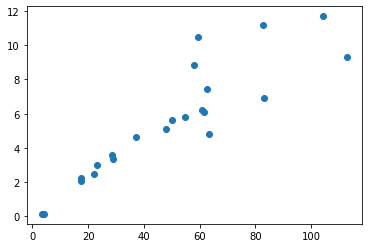

In [4]:
plt.scatter(Titer, Spec_prod)

In [5]:
Round3_summary.to_csv('Check_Result_Summary.csv')

In [8]:
Exp_4_pd = pd.read_csv('/Users/harini/Desktop/BO/BO_MediaOptimization/Molecules/RBDJ/RBDJ_Prod_CoCaBO/Codes/Checks/Reconstructed_Check.csv')

Exp_4 = Exp_4_pd.iloc[:,1:].values

initN = 24

In [9]:
Stock_solid = pd.read_excel('/Users/harini/Desktop/BO/BO_MediaOptimization/Molecules/RBDJ/RBDJ_Prod_CoCaBO/Codes/CarbonSourceInfo.xlsx', 'Stocks_solid')
Stock_liquid = pd.read_excel('/Users/harini/Desktop/BO/BO_MediaOptimization/Molecules/RBDJ/RBDJ_Prod_CoCaBO/Codes/CarbonSourceInfo.xlsx', 'Stocks_liquid')

Carbon_Names = Stock_solid['Carbon Source'].values.tolist()
Carbon_Names.append(Stock_liquid['Carbon Source'][1])
Carbon_Names.append(Stock_liquid['Carbon Source'][2])


Carbon_Ub = [50]*17 #[g/L]
Carbon_Ub.append(10) # Glycerol [mL/L]
Carbon_Ub.append(50) #Ethanol [mL/L]

OG_Gly_Ub = 100 #[mL/L]
Met_Ub = 100 #[mL/L]


Stock_Conc = Stock_solid['g/mL'].values.tolist()
Stock_Conc.append(Stock_liquid['mL/mL'][1].tolist())
Stock_Conc.append(Stock_liquid['mL/mL'][2].tolist())

OG_Stock_Conc = Stock_liquid['mL/mL'][0].tolist()


Selected_Carbon = []
Carbon_mL = []
OG_Gly_mL = []
Met_mL = []


for i in range(initN):
    Selected_Carbon.append(Carbon_Names[int(Exp_4[i,0])])
    temp_factor = Carbon_Ub[int(Exp_4[i,0])]
    temp = Exp_4[i,1] * temp_factor # (g/L)
    Carbon_mL.append(temp)
    OG_Gly_mL.append(Exp_4[i,2] * OG_Gly_Ub * 100/1000) #(%)
    Met_mL.append(Exp_4[i,3] * Met_Ub * 100/1000)#(%)
    
    

Experiment_1 = {'Carbon_Type': Selected_Carbon,
               'Conc_Carbon [g/L]': Carbon_mL,
               'Gly_OG [%]': OG_Gly_mL,
               'Met_Prod [%]': Met_mL}

pd.DataFrame(Experiment_1).to_csv('Check_Design_Summary.csv')
